In [1]:
import matplotlib
%matplotlib inline
import hampy, healpy as hp, matplotlib.pyplot as plt, numpy as np
from pylab import cm
from matplotlib.colors import LogNorm
cmap = cm.get_cmap('jet')
cmap.set_under('w')
from functools import partial
from time import time

from Convenience import *

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 14}

ImportError: No module named hampy

standard example

....

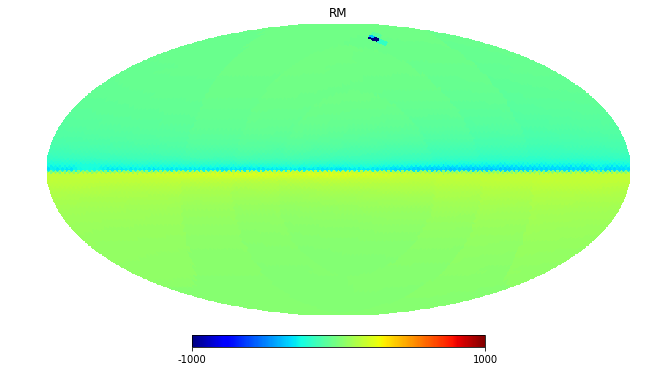

In [6]:
ham = hampy.Hampy()
ham.call()

maps = ham.get_observables()
hp.mollview( maps['RM'], min=-1000, max=1000, title='RM', cmap=cmap)

In [7]:
ham.get_params()

{'B_field_do_random': 'F',
 'B_field_nx': 128,
 'B_field_ny': 128,
 'B_field_nz': 26,
 'B_field_seed': '1486647502',
 'B_field_type': '1',
 'B_ran_mem_lim': '4',
 'TE_grid_filename': 'test/negrid_n400.bin',
 'TE_nx': '400',
 'TE_ny': '400',
 'TE_nz': '80',
 'do_dm': 'F',
 'do_dust': 'F',
 'do_ff': 'F',
 'do_rm': 'T',
 'do_sync_emission': 'T',
 'do_tau': 'F',
 'max_radius': '30',
 'obs_DM_file_name': '/data/virtualenv/hammurapy/hammurabicode-code/hampy/test.out/dm.fits',
 'obs_NSIDE': '128',
 'obs_RM_file_name': '/data/virtualenv/hammurapy/hammurabicode-code/hampy/test.out/rm.fits',
 'obs_dust_file_name': '/data/virtualenv/hammurapy/hammurabicode-code/hampy/test.out/IQU_dust.fits',
 'obs_ff_file_name': '/data/virtualenv/hammurapy/hammurabicode-code/hampy/test.out/free.fits',
 'obs_file_name': '/data/virtualenv/hammurapy/hammurabicode-code/hampy/test.out/IQU_sync.fits',
 'obs_freq_GHz': '23',
 'obs_map_overwrite': 'T',
 'obs_shell_index_numb': '3',
 'obs_tau_file_name': '/data/virtualenv

In [8]:
ham.cleanup()


actual use

JF12

In [9]:
ham=hampy.Hampy(custom_parameters={
 "B_field_type":"7",       #  Select the JF12 model
 "B_field_do_random":"T",  #  Do include the random component
 "use_B_analytic":"T",     #  Use the analytic integration method 
 "B_analytic_beta":"1.36", #  Include the fudge factor corresponding to the striated field
# "B_field_RMS_uG":6.,      #  The default is 6uG, but for this model, this param scales up 
 "B_field_RMS_uG":0.2,      #  The default is 6uG, but for this model, this param scales up 
                           #   or down the JF12 random component. 1=original is a very strong random
                           #   component.  Here, we turn it down so the comparison is easier.
"do_dm":"T"                # to compute DM
 })
ham.call()

.....

0

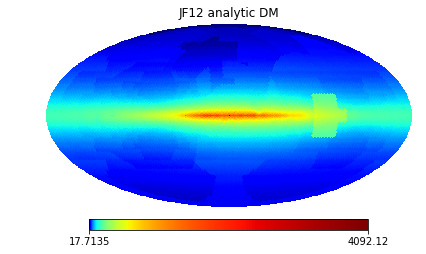

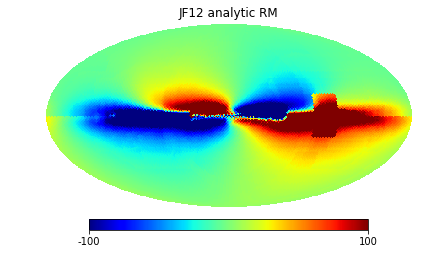

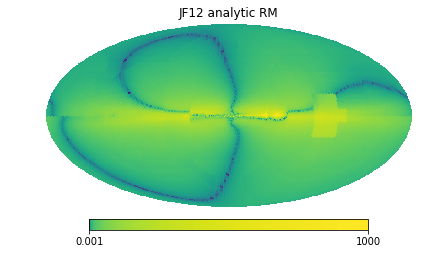

In [10]:
mapsJFRM=ham.get_observables()
matplotlib.rcParams['figure.figsize'] = (10.0, 4.0)
hp.mollview( mapsJFRM['DM'],title='JF12 analytic DM',hold=True,cmap=cmap, norm='log')
plt.show()
hp.mollview( mapsJFRM['RM'],min=-100,max=100,title='JF12 analytic RM',hold=True,cmap=cmap)
plt.show()
hp.mollview( np.abs(mapsJFRM['RM']),title='JF12 analytic RM', min=1e-3, max=1e3,hold=True,  norm='log')
plt.show()

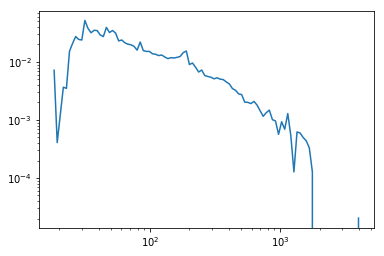

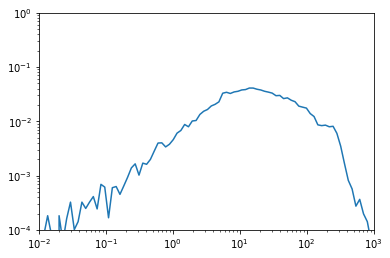

In [14]:
matplotlib.rcParams['figure.figsize'] = (6.0, 4.0)
P, x = Histogram( np.abs(mapsJFRM['DM']), log=True, density=True, bins=100 )
PlotLikelihood( x, P, density=False )
plt.show()
P, x = Histogram( np.abs(mapsJFRM['RM']), log=True, density=True, bins=100 )
PlotLikelihood( x, P, density=False)
plt.ylim(1e-4,1)
plt.xlim(1e-2,1e3)
plt.show()


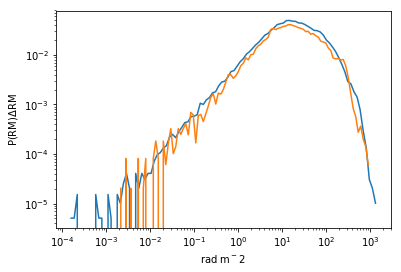

In [18]:
fig, ax = plt.subplots()
with h5.File( 'RM_galactic_foreground.hdf5' ) as f:
    RM = f['maps/phi'].value
    P, x = Histogram( np.abs(RM), log=True, density=True, bins=100)
    PlotLikelihood( x, P, density=False, ax=ax, measure='RM')
P, x = Histogram( np.abs(mapsJFRM['RM']), log=True, density=True, bins=100 )
PlotLikelihood( x, P, density=False, ax=ax)
#ax.set_ylim(1e-4,1)
#ax.set_xlim( 1e-2, 1e3)


In [29]:
mapsJFRM.keys()

['Qs', 'DM', 'Is', 'Us', 'RM', 'PIs']

In [107]:
positions = [
    [0.,0.,0.],
    [-8.5,0.,0.],
    [8.5,0.,0.],
    [0.,-8.5,0.],
    [0.,8.5,0.],
    [0.,0.,1.5],
    [0.,0.,-1.5],
]
origin = [20.,20.,3.]
ham.cleanup()
ham=hampy.Hampy(custom_parameters={
# "B_field_nx":"400",
# "B_field_ny":"400",
# "B_field_nz":"80",
 "B_field_type":"7",       #  Select the JF12 model
 "B_field_do_random":"T",  #  Do include the random component
 "use_B_analytic":"T",     #  Use the analytic integration method 
 "B_analytic_beta":"1.36", #  Include the fudge factor corresponding to the striated field
 "B_field_RMS_uG":0.2,     #  The default is 6uG, but for this model, this param scales up 
 "do_sync_emission":"F",   
 'do_dm':'T',
 'do_rm':'T',
# "origin":[0.,0.,0.]     #   component.  Here, we turn it down so the comparison is easier.
})
for position in positions:
    ham.cleanup()
#    ham.call( {'origin':origin} )
#    ham.call( {'SunPosX':position[0]+origin[0],'SunPosY':position[1]+origin[1],'SunPosZ':position[2]+origin[2], } )
    ham.call( {'SunPosX':position[0],'SunPosY':position[1],'SunPosZ':position[2],
               'obs_DM_file_name':'test.out/DM_xyz%.2f_%.2f_%.2f).fits' % tuple(position),
               'obs_RM_file_name':'test.out/RM_xyz%.2f_%.2f_%.2f).fits' % tuple(position),
#               'obs_DM_file_name':'/data/data/galaxy_disc/out/DM_xyz%.2f_%.2f_%.2f).fits' % tuple(position),
#               'obs_RM_file_name':'/data/data/galaxy_disc/out/RM_xyz%.2f_%.2f_%.2f).fits' % tuple(position),
              } )
    print ham.get_params(['SunPosX','SunPosY','SunPosZ','origin','Ldims'])
    mapsJFRM=ham.get_observables()
    continue
    matplotlib.rcParams['figure.figsize'] = (10.0, 4.0)
    hp.mollview(mapsJFRM['RM'],min=-200,max=200,title='JF12 analytic RM',cmap=cmap, sub=(1,2,1) )
    hp.mollview(np.abs(mapsJFRM['RM']),min=1e-3,max=2e2,title='JF12 analytic |RM|',cmap=cmap, norm=LogNorm(), sub=(1,2,2) )
    plt.show()

    P, x = Histogram( np.abs(mapsJFRM['RM']), log=True, density=True, range=(1e-3, 1e2), bins=100 )
    plt.loglog( x[:-1]+np.diff(x)/2, P )
    plt.show()

...{'SunPosZ': 0.0, 'SunPosY': 0.0, 'SunPosX': 0.0}


IOError: [Errno 2] No such file or directory: '/data/virtualenv/hammurapy/hammurabicode-code/hampy/test.out/rm.fits'

Jaffe13

In [32]:
## does not work that easily

ham.cleanup()
ham=hampy.Hampy(custom_parameters="test/jaffe13b_Rg2_30.txt")
ham.call()

.......................................................................................................................................................................................................................................................................................................................................................................................

0

In [33]:
mapsJaffeRM=ham.get_observables()
matplotlib.rcParams['figure.figsize'] = (10.0, 4.0)
hp.mollview(mapsJaffeRM['RM'],min=-200,max=200,title='JF12 analytic RM',hold=True,cmap=cmap)
plt.show()

P, x = Histogram( np.abs(mapsJaffeRM['RM']), log=True, density=True, range=(1e-3, 1e2), bins=100 )

plt.loglog( x[:-1]+np.diff(x)/2, P )
plt.show()


IOError: [Errno 2] No such file or directory: '/data/virtualenv/hammurapy/hammurabicode-code/hampy/test.out/IQU_sync.fits'

use external files

In [ ]:
ham = hampy.Hampy( working_directory='/data/data/hampy/galaxy',
                  custom_parameters= {
                      'B_field_type' : "6",    ## use external data written to file
                      'B_field_coherent_inp' : '/data/data/galaxy_disc/galaxy_disc_B.bin'
                      'B_field_nx' : 128, 
                      'B_field_ny' : 128, 
                      'B_field_nz' : 128, 
                      'TE_grid_filename': 'test/negrid_n400.bin',
                      'TE_nx': '400',
                      'TE_ny': '400',
                      'TE_nz': '80',
                  }
                     
                 )

In [39]:
ham.parameters_dict

{'B_analytic_beta': '1.36',
 'B_field_RMS_uG': 0.2,
 'B_field_do_random': 'T',
 'B_field_nx': 128,
 'B_field_ny': 128,
 'B_field_nz': 26,
 'B_field_seed': '1486647502',
 'B_field_type': '7',
 'B_ran_mem_lim': '4',
 'TE_grid_filename': 'test/negrid_n400.bin',
 'TE_nx': '400',
 'TE_ny': '400',
 'TE_nz': '80',
 'do_dm': 'F',
 'do_dust': 'F',
 'do_ff': 'F',
 'do_rm': 'T',
 'do_sync_emission': 'T',
 'do_tau': 'F',
 'max_radius': '30',
 'obs_DM_file_name': '/data/virtualenv/hammurapy/hammurabicode-code/hampy/test.out/dm.fits',
 'obs_NSIDE': '128',
 'obs_RM_file_name': '/data/virtualenv/hammurapy/hammurabicode-code/hampy/test.out/rm.fits',
 'obs_dust_file_name': '/data/virtualenv/hammurapy/hammurabicode-code/hampy/test.out/IQU_dust.fits',
 'obs_ff_file_name': '/data/virtualenv/hammurapy/hammurabicode-code/hampy/test.out/free.fits',
 'obs_file_name': '/data/virtualenv/hammurapy/hammurabicode-code/hampy/test.out/IQU_sync.fits',
 'obs_freq_GHz': '23',
 'obs_map_overwrite': 'T',
 'obs_shell_index

In [2]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm
def ScatterDensityPlot( x, y, weight=1., log=False, xlim=None, ylim=None ):
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)*weight

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    fig, ax = plt.subplots()
    cax = ax.scatter(x, y, c=z, s=50, edgecolor='', norm=LogNorm() if log else None)
    if xlim:
        ax.set_xlim(*xlim)
    if ylim:
        ax.set_ylim(*ylim)
    fig.colorbar( cax )
    plt.show()

Host

In [28]:
def Uniform( r, phi, z):
    return 1

def StarDensity( z, phi, r, z_thin=.3, r_thin=2.6, z_thick=.9, r_thick=3.6  ):
    # z, r in kpc
    # best fit parameters from Juric et al. 2008
    return np.exp( -z/z_thin - r/r_thin - z/z_thick - r/r_thick )

weighs = {
    'Uniform' : Uniform,
    'StarDensity_MW' : partial( StarDensity, z_thin=0.35, z_thick=0.9, r_thin=3.8, r_thick=3.8 ),
#    'StarDensity_MW' : partial( StarDensity, z_thin=0.35, z_thick=0.9, r_thin=3.8, r_thick=3.8 ),
    
}



In [29]:
def RandomPositions( N, borders=np.array([[-20.,-20.,-3.,],[20.,20.,3.]]), seed=42, max_dist=20.):
    RS = np.random.RandomState( 1+seed )
    positions = np.array( [ RS.uniform( b_lo, b_hi, N ) for b_lo, b_hi in zip( *borders) ] )
    if max_dist is not None:
        origin = ( (borders[1] - borders[0])/2 + borders[0] ).reshape(3,1)
        while True:
            exc = np.where( np.linalg.norm( positions - origin, axis=0 ) > max_dist )[0]
            if len(exc) == 0:
                break
            positions[:,exc] = np.array( [ RS.uniform( b_lo, b_hi, len(exc) ) for b_lo, b_hi in zip( *borders) ] )
        
    return positions.transpose()

def InverseCDF_r(u, d=1., N=1.):
    return np.log(1./(1-d/N*u)) / d

def InverseCDF_z(u, c=4):
    sol = np.zeros(u.shape)
    lo = u < 0.5
    hi = u > 0.5
    sol[lo] = np.log( 2*u[lo] * ( 1-np.exp(-3*c) ) + np.exp(-3*c) ) / c
    sol[hi] = -np.log( 1 - ( 2*u[hi] - 1 )*( 1 - np.exp(-3*c) ) )/c
    return sol

def RandomPositions_StarDensity_MW( N, borders=np.array([[0.,0.,0,],[1.,2.*np.pi,1.]]), seed=42, max_dist=None, R_thin=2.6, R_thick=3.6, Z_thin=0.3, Z_thick=0.9, R_max=20., Z_max=3. ):
    # best fit parameters from Juric et al. 2018
    RS = np.random.RandomState( 1+seed )
    ## get random values, uniform distribution
    positions = np.array( [ RS.uniform( b_lo, b_hi, N ) for b_lo, b_hi in zip( *borders) ] )

    ## repetitive constants
    c = 1./Z_thin + 1./Z_thick
    d = 1./R_thin + 1./R_thick
    N_r = d / ( 1 - np.exp(-R_max*d))

    ## obtain actual coordinates from uniform distribution
#    positions[0] = np.log(1./(1-d/N_r*positions[0])) / d
    positions[0] = InverseCDF_r( positions[0], d=d, N=N_r)
    phi = positions[1]
    positions[2] = InverseCDF_z( positions[2], c=c)

    ## exclude positions outside the allowed range
    positions = positions[:, (positions[0]<R_max)*(np.abs(positions[2])<Z_max) ]

    ## transform to cartesian coordinates
    positions = np.array( cyl2cart( *positions ) )
    return positions.transpose()

GetRandomPositions = {
    'Uniform' : RandomPositions ,
    'StarDensity_MW': RandomPositions_StarDensity_MW ,
}


-2.6660290680169068 2.7624147381632684
-2.985837918078716 2.9784592021306078


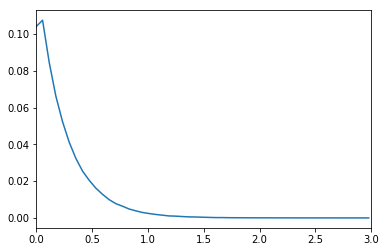

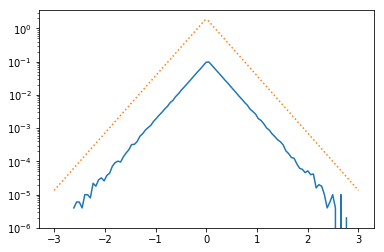

In [9]:
Z_max, c, N_z = 3.000000, 3.968254, 1.984140
N = 10**6
randoms = np.random.uniform(0,1,N)
'''
hi = randoms > 0.5
lo = randoms < 0.5

Z = np.zeros(N)
Z[hi] = - np.log( - 1./( ( np.exp(-Z_max*c) - 2 ) + c/N_z*randoms[hi] ) ) /c  ## u > 0.5
#Z[lo] = - np.log( c/N*randoms[lo] + np.exp(-3*c) ) / c                        ## u < 0.5
Z[lo] = - np.log( 1./( c/N*randoms[lo] + np.exp(-3*c) ) ) / c                        ## u < 0.5
#Z[hi] =  (- 1./( ( np.exp(-Z_max*c) - 2 ) + c/N_z*randoms[hi] ) ) /c  ## u > 0.5
#Z[lo] = (c/N*randoms[lo] + np.exp(-3*c) )                         ## u < 0.5
'''
Z = InverseCDF_z( randoms, c=c )

print Z[hi].min(), Z[hi].max()
print Z[lo].min(), Z[lo].max()


P, x = Histogram( Z[lo], bins=100, density=True, log=False )
PlotLikelihood( x, P, density=False, log=False )
plt.xlim(0,3)
P, x = Histogram( Z[hi], bins=100, density=True, log=False )
PlotLikelihood( x, P, density=False, log=False )


z = np.linspace(-3,3,100)
P = N_z * np.exp( -np.abs(z)*c )

plt.plot( z, P, linestyle=':' )
plt.yscale('log')



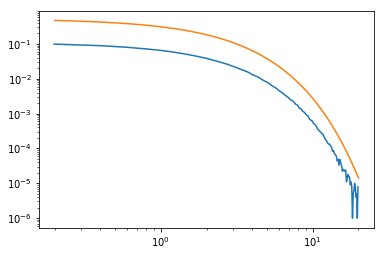

In [81]:

R_max, d, N_r = 20.000000, 0.526316, 0.526330

N = 10**6
randoms = np.random.uniform(0,1,N)

R = np.log(1./(1-d/N_r*randoms)) / d

P, x = Histogram( R, bins=100, density=True )
PlotLikelihood( x, P, density=False )

r = 10.**np.linspace(np.log10(0.2),np.log10(20),100)
P = N_r * np.exp( -r*d )

plt.plot( r, P  )

In [3]:
def cart2cyl( x, y, z ):
    r = np.sqrt( x**2 + y**2 )
    phi = np.arctan2( y, x )
    return r, phi, z

def cyl2cart( r, phi, z ):
    x = r*np.cos(phi)
    y = r*np.sin(phi)
    return x, y, z


In [2]:
from multiprocessing import Pool
from functools import partial

root = '/data/data/galaxy_disc/out/'

def GalaxySkyFile( position, model, measure ):
    return root + 'GalaxySky_%s_%s_xyz%.2f_%.2f_%.2f.fits' % ( measure, model, position[0], position[1], position[2] )

def KeyGalaxySky( position, model, measure ):
    return 'GalaxySky_%s_%s_xyz%.2f_%.2f_%.2f.fits' % ( measure, model, position[0], position[1], position[2] )



custom_parameters = {
    'JF12': {
         "B_field_type":"7",       #  Select the JF12 model
         "B_field_do_random":"T",  #  Do include the random component
         "use_B_analytic":"T",     #  Use the analytic integration method 
         "B_analytic_beta":"1.36", #  Include the fudge factor corresponding to the striated field
         "B_field_RMS_uG":0.2,     #  The default is 6uG, but for this model, this param scales up 
         "do_sync_emission":"F",   
         'do_dm':'T',
         'do_rm':'T',
    }
}



def MakeGalaxySkymap( position, model='JF12', ham=None ):
    if ham is None:
        ham = hampy.Hampy( custom_parameters=custom_parameters[model] )
#    else:
    ham.cleanup()
    ham.call( {'SunPosX':position[0],'SunPosY':position[1],'SunPosZ':position[2] } )
    maps = ham.get_observables()
    return maps

def MakeGalaxyLikelihood( position, model='Uniform', ham=None, range_DM=(1e-3,1e3), range_RM=(1e-3,1e2), bins=100 ):
    m = MakeGalaxySkymap( position, model, ham )
    P_DM, x_DM = Histogram( np.abs(m['DM']), log=True, density=True, range=range_DM, bins=bins )
    P_RM, x_RM = Histogram( np.abs(m['RM']), log=True, density=True, range=range_RM, bins=bins )
    
    #### !!!! WHY is RM identical in parallel ??? while DM is not ???
    return P_DM, P_RM

def MakeGalaxyPrediction(N=10, borders=np.array([[-20.,-20.,-3.],[20.,20.,3.]]), seed=42, range_DM=(1e-3, 1e2), range_RM=(1e-3,1e2), bins=100, model='JF12', max_dist=None, plot=False, plot_all=False, plot_skies=False, weigh='Uniform', parallel=False ):
    ## find N evenly distributed random positions in Galaxy, according to wight function
    #positions = RandomPositions( N, borders=borders, seed=seed, max_dist=max_dist )
    positions = GetRandomPositions[weigh]( N, seed=seed )
    try:
        ham.cleanup()
    except:
        pass
    
    ## for each position, calculate DM & RM sky
    if parallel:
#        f = partial( MakeGalaxySkymap, model=model)
        f = partial( MakeGalaxyLikelihood, model=model, range_DM=range_DM, range_RM=range_RM, bins=bins)
        pool = Pool(16)
#        maps = np.array( pool.map( f, positions ) )
#        Ps_DM, Ps_RM = np.rollaxis( np.array( pool.map( f, positions ) ), 1, 0 )
        Ps_DM, Ps_RM = np.rollaxis( np.array( map( f, positions ) ), 1, 0 )
        pool.close()
        pool.join()
        x_DM = 10.**np.linspace( *np.log10(range_DM), num=bins+1 )
        x_RM = 10.**np.linspace( *np.log10(range_RM), num=bins+1 )
    else:
        ham = hampy.Hampy( custom_parameters=custom_parameters[model] )
        f = partial( MakeGalaxySkymap, model=model, ham=ham)
        maps = map( f, positions )
    
        Ps_DM, Ps_RM = [], []
    
        for p, m in zip( positions, maps ):
            P_DM, x_DM = Histogram( np.abs(m['DM']), log=True, density=True, range=range_DM, bins=bins )
            P_RM, x_RM = Histogram( np.abs(m['RM']), log=True, density=True, range=range_RM, bins=bins )
            if plot_skies:
                matplotlib.rcParams['figure.figsize'] = (10.0, 4.0)
                hp.mollview(m['DM'],min=1e-8,max=2e2,title=model+' analytic DM',cmap=cmap, norm=LogNorm() ,sub=(1,3,1) )
                hp.mollview(m['RM'],min=-200,max=200,title=model+' analytic RM',cmap=cmap, sub=(1,3,2) )
                plt.subplot(1,3,3)
                plt.loglog( x_RM[:-1]+np.diff(x_RM), P_RM )
                plt.show()
            if not ( np.any( np.isnan(P_DM) ) or np.any( np.isinf( P_DM ) ) ):
                Ps_DM.append(P_DM)
            if not ( np.any( np.isnan(P_RM) ) or np.any( np.isinf( P_RM ) ) ):
                Ps_RM.append(P_RM)
        Ps_DM = np.array( Ps_DM )
        Ps_RM = np.array( Ps_RM )

    if plot_all:
        fig, ax = plt.subplots(1,1)
        for P in Ps_DM:
            PlotLikelihood( x_DM, P, ax=ax )
        plt.show()
        fig, ax = plt.subplots(1,1)
        for P in Ps_RM:
            PlotLikelihood( x_RM, P, ax=ax )
        plt.show()

#    r, phi, z = cart2cyl( *positions.transpose() )
    ## combine likelihood functions
    PP_DM = np.sum( Ps_DM, axis=0 )/len(Ps_DM)
    PP_RM = np.sum( Ps_RM, axis=0 )/len(Ps_RM)
    if plot:
        fig, axs = plt.subplots( 1,2, figsize=(8,3), sharey='all' )
        PlotLikelihood( x_DM, PP_DM, measure='DM', ax=axs[0], label=r"Host, JF12, %s" % weigh ) # + ( 'uniform' if weigh=='Uniform' else r"$n_{\rm star}$" ) )

        PlotLikelihood( x_RM, PP_RM, measure='RM', ax=axs[1], label=r"Host, JF12, %s" % weigh ) # + ( 'uniform' if weigh=='Uniform' else r"$n_{\rm star}$" ) )
#        for ax in axs:
#            ax.legend()
        axs[0].legend()
        axs[0].set_ylim(1e-4,1)
        fig.subplots_adjust( wspace=0 )
        plt.show()
        
    ##    write to file
    Write2h5( likelihood_file, [PP_DM, x_DM, PP_RM, x_RM],
            [ KeyHost( model, weigh, '/'.join([t,v]) ) for t in ['DM','RM'] for v in ['P', 'x'] ] 
            )   


......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

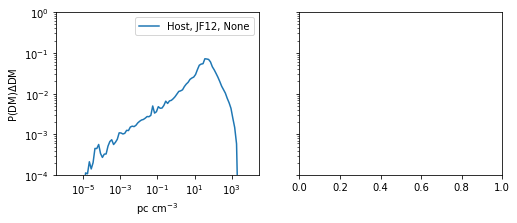

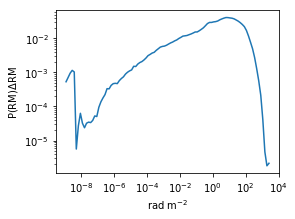

440.598634005


In [32]:
t0 = time()
MakeGalaxyPrediction(N=300, borders=np.array([[-20.,-20.,-3.],[20.,20.,3.]]), seed=137, max_dist=15., plot=True, range_DM=(1e-6,1e4), range_RM=(1e-9,3e3), parallel=False )
print time() - t0

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

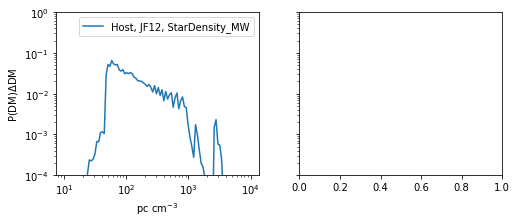

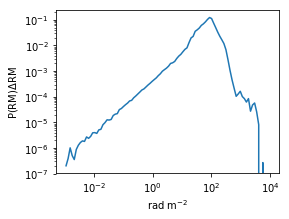

548.451187134


In [34]:
t0 = time()
MakeGalaxyPrediction(N=300, weigh='StarDensity_MW', borders=np.array([[-20.,-20.,-3.],[20.,20.,3.]]), seed=137, max_dist=15., plot=True, range_DM=(1e1,1e4), range_RM=(1e-3,1e4), parallel=True )
print time() - t0

R_max, d, N_r = 20.000000, 0.662393, 0.662394
Z_max, c, N_z = 3.000000, 4.444444, 2.222226
(10000, 3)


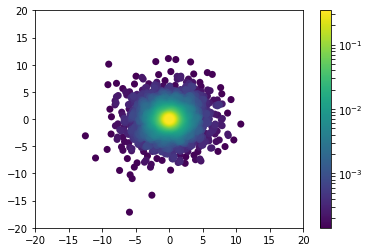

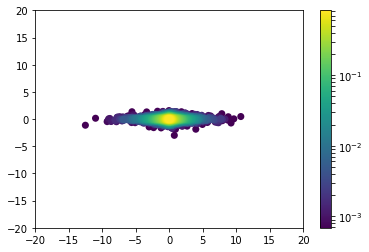

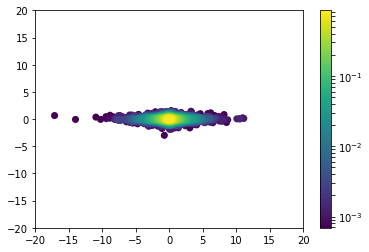

In [34]:
pos = RandomPositions( 1000, borders=np.array([[-20.,-20.,-3.],[20.,20.,3.]]), seed=88, max_dist=19. )
pos = RandomPositions_StarDensity_MW( 10000, seed=88, R_thin=2.6, R_thick=3.6, Z_thin=0.3, Z_thick=0.9 )

'''
for i in range(3):
    P, x = Histogram( pos[:,i], density=True, log=False )
    PlotLikelihood( x, P, density=False, log=False )
    plt.yscale('log')
    plt.show()
'''   
print pos.shape
#w = weighs['StarDensity_MW']( *cart2cyl( *pos.transpose() ) )
ScatterDensityPlot( pos[:,0], pos[:,1], log=True, xlim=(-20,20), ylim=(-20,20) )#, weight=w )
ScatterDensityPlot( pos[:,0], pos[:,2], log=True, xlim=(-20,20), ylim=(-20,20) )#, weight=w )
ScatterDensityPlot( pos[:,1], pos[:,2], log=True, xlim=(-20,20), ylim=(-20,20) )#, weight=w )


In [71]:
x = -1./np.arange(7)
print x
print np.isnan( x )
print np.isinf( x )

[       -inf -1.         -0.5        -0.33333333 -0.25       -0.2
 -0.16666667]
[False False False False False False False]
[ True False False False False False False]


/data/virtualenv/hammurapy/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.


In [50]:
cyl2cart( 3., 4*np.pi/2, 1. )

(3.0, -7.347880794884119e-16, 1.0)

In [141]:
from view_field import view_field

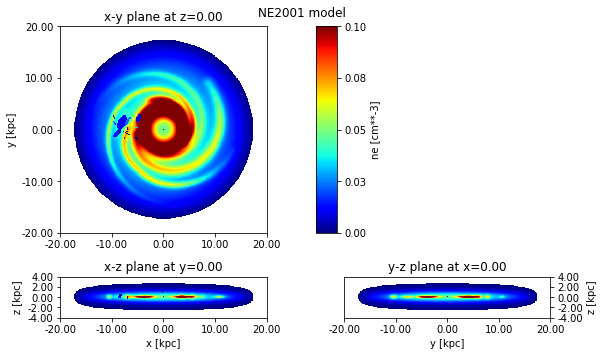

In [145]:
matplotlib.rcParams['figure.figsize'] = (9.0, 5.0)
view_field(infile='test/negrid_n400.bin',
           Ndims=[400,400,80],  #  The dimensions of the box given, in bins
           Ldims=[40,40,8],     #  The physical dimensions of the box
           scalar=True,         #  Specify that it's a vector quantity.
           label='ne [cm**-3]',
           crange=[1e-3,0.1],
           title='NE2001 model'
           )


In [40]:
ham.working_directory

'/data/virtualenv/hammurapy/hammurabicode-code/hampy/test.out'

In [16]:
ham.cleanup()

Milky Way

In [36]:
ham=hampy.Hampy(custom_parameters={
 "B_field_type":"7",       #  Select the JF12 model
 "B_field_do_random":"T",  #  Do include the random component
 "use_B_analytic":"T",     #  Use the analytic integration method 
 "B_analytic_beta":"1.36", #  Include the fudge factor corresponding to the striated field
 "B_field_RMS_uG":1.,      #  The default is 6uG, but for this model, this param scales up 
                           #   or down the JF12 random component. 1=original is a very strong random
                           #   component.  Here, we turn it down so the comparison is easier.
 "do_dm":"T",
 "NSIDE":512,
 "obs_NSIDE":512,
 })
ham.call()

mapsJFRM=ham.get_observables()

........................................................................

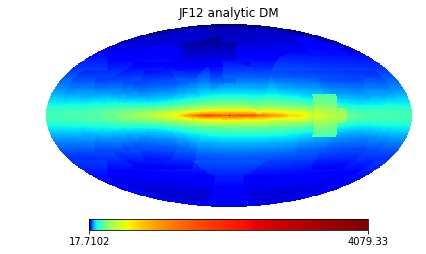

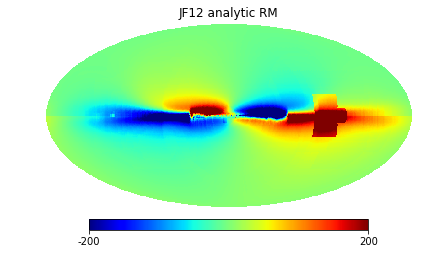

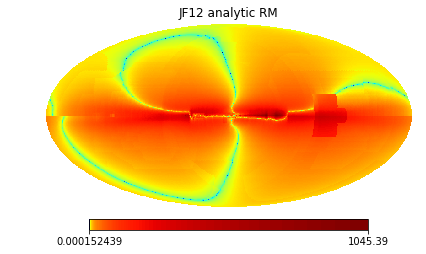

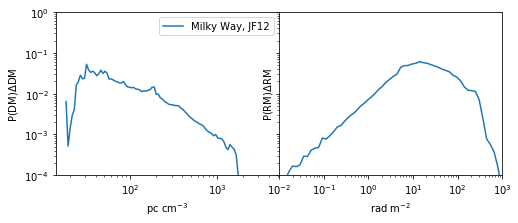

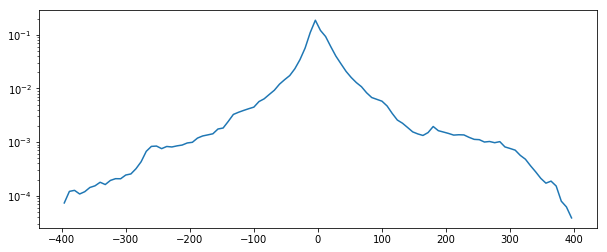

100
101
100
101
100
101


In [26]:
## create likelihood function for full sky

matplotlib.rcParams['figure.figsize'] = (10.0, 4.0)
hp.mollview(mapsJFRM['DM'],title='JF12 analytic DM',hold=True,cmap=cmap, norm='log')
plt.show()
hp.mollview(mapsJFRM['RM'],title='JF12 analytic RM',hold=True,cmap=cmap, min=-200, max=200)
plt.show()
hp.mollview(np.abs(mapsJFRM['RM']),title='JF12 analytic RM',hold=True,cmap=cmap, norm='log')
plt.show()

## write maps to file
Write2h5( sky_file, [ mapsJFRM[t] for t in ['DM','RM'] ],
        [ KeyMilkyWay( 'JF12', t ) for t in ['DM','RM'] ] )

data = []

bins=100

P, x = Histogram( np.abs(mapsJFRM['DM']), log=True, density=True, bins=bins )
data.extend([P,x])

fig, axs = plt.subplots( 1,2, figsize=(8,3), sharey='all' )
PlotLikelihood( data[-1], data[-2], density=False, measure='DM', ax=axs[0], label='Milky Way, JF12'  )
plt.ylim(1e-4,1)
#plt.loglog( x[:-1]+np.diff(x)/2, P )
#plt.show()

data.extend( Histogram( np.abs(mapsJFRM['RM']), log=True, density=True, bins=bins ) )

#fig, ax = plt.subplots( figsize=(4,3) )

PlotLikelihood( data[-1], data[-2], density=False, measure='RM', ax=axs[1], label='Milky Way, JF12' )
axs[1].set_xlim(1e-2,1e3)
axs[1].set_ylim(1e-4,1)
#for ax in axs:
#    ax.legend()
axs[0].legend()

#plt.loglog( x[:-1]+np.diff(x)/2, P )
fig.subplots_adjust( wspace=0 )
plt.show()

data.extend( Histogram( mapsJFRM['RM'], log=False, density=True, bins=bins, range=(-400,400) ) )
PlotLikelihood( data[-1], data[-2], density=False, log=False )
plt.yscale('log')
plt.show()


for c in data:
    print c.size

## write Likelihoods to file
Write2h5( likelihood_file, data,
        [ KeyMilkyWay( 'JF12', '/'.join([t,v]) ) for t in ['DM','RM'] for v in ['P', 'x'] ] 
        )

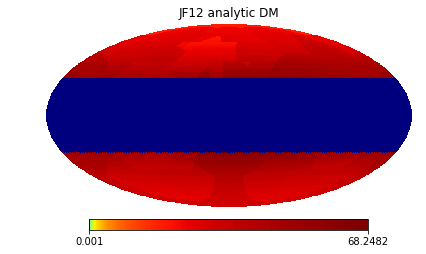

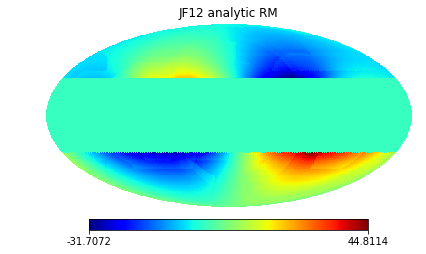

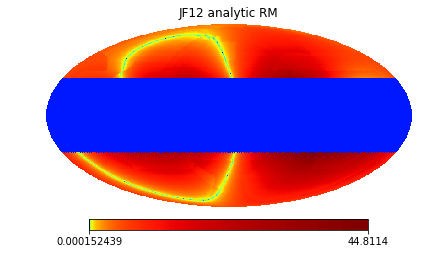

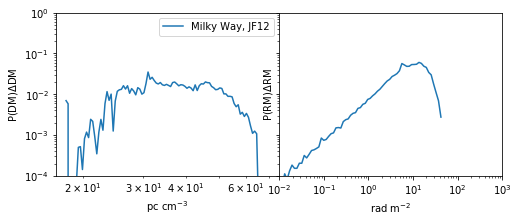

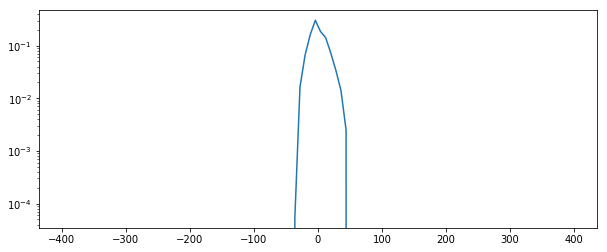

100
101
100
101
100
101


In [37]:
## create likelihood function excluding the galactic plane
minimum_latitude = 30 # degree

data = []

bins=100

npix = len( mapsJFRM['DM'] )
nside = hp.npix2nside( npix )
l, b = hp.pix2ang( nside, np.arange(npix), lonlat=True )
hi_lat = np.abs(b) >= minimum_latitude

DM = np.array(mapsJFRM['DM'])
RM = np.array(mapsJFRM['RM'])
DM[True^hi_lat] = 1e-3
RM[True^hi_lat] = 1e-3

matplotlib.rcParams['figure.figsize'] = (10.0, 4.0)
hp.mollview(DM,title='JF12 analytic DM',hold=True,cmap=cmap, norm='log')
plt.show()
hp.mollview(RM,title='JF12 analytic RM',hold=True,cmap=cmap)
plt.show()
hp.mollview(np.abs(RM),title='JF12 analytic RM',hold=True,cmap=cmap, norm='log')
plt.show()

P, x = Histogram( np.abs(mapsJFRM['DM'])[hi_lat], log=True, density=True, bins=bins )
data.extend([P,x])

fig, axs = plt.subplots( 1,2, figsize=(8,3), sharey='all' )
PlotLikelihood( data[-1], data[-2], density=False, measure='DM', ax=axs[0], label='Milky Way, JF12'  )
plt.ylim(1e-4,1)
#plt.loglog( x[:-1]+np.diff(x)/2, P )
#plt.show()

data.extend( Histogram( np.abs(mapsJFRM['RM'])[hi_lat], log=True, density=True, bins=bins ) )

#fig, ax = plt.subplots( figsize=(4,3) )

PlotLikelihood( data[-1], data[-2], density=False, measure='RM', ax=axs[1], label='Milky Way, JF12' )
axs[1].set_xlim(1e-2,1e3)
axs[1].set_ylim(1e-4,1)
#for ax in axs:
#    ax.legend()
axs[0].legend()

#plt.loglog( x[:-1]+np.diff(x)/2, P )
fig.subplots_adjust( wspace=0 )
plt.show()

data.extend( Histogram( mapsJFRM['RM'][hi_lat], log=False, density=True, bins=bins, range=(-400,400) ) )
PlotLikelihood( data[-1], data[-2], density=False, log=False )
plt.yscale('log')
plt.show()


for c in data:
    print c.size

## write Likelihoods to file
#Write2h5( likelihood_file, data,
#        [ KeyMilkyWay( 'JF12/lat%i' % minimum_latitude, '/'.join([t,v]) ) for t in ['DM','RM'] for v in ['P', 'x'] ] 
#        )

Koertgen

In [63]:
with h5.File('galaxy_disc.hdf5') as f:
    rho = f['dens']
rho.shape

Test Likelihoods

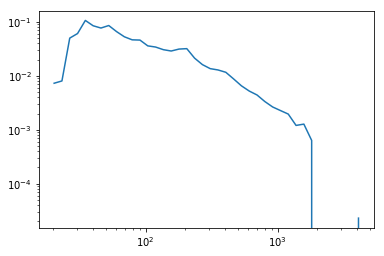

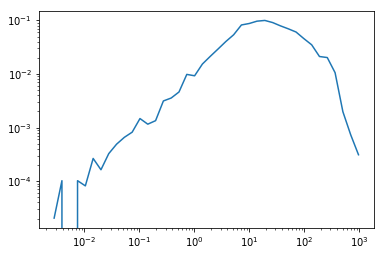

In [28]:
with h5.File(likelihood_file) as f:
    for measure in ['DM','RM']:
        P = f[KeyMilkyWay('JF12', measure+'/P')].value
        x = f[KeyMilkyWay('JF12', measure+'/x')].value
        PlotLikelihood( x, P )

/data/virtualenv/hammurapy/local/lib/python2.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


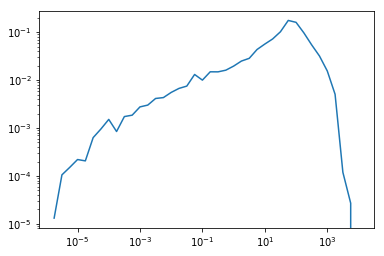

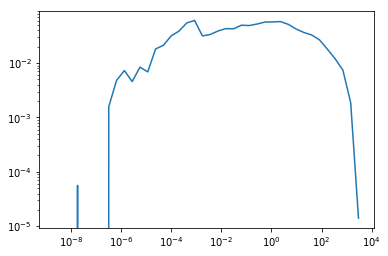

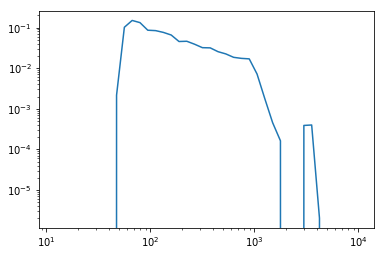

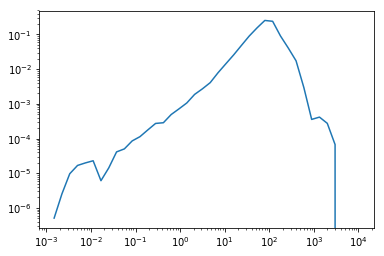

In [25]:
with h5.File(likelihood_file) as f:
    for weigh in ['Uniform', 'StarDensity_MW']:
        for measure in ['DM','RM']:
            P = f[KeyHost('JF12', weigh, measure+'/P')].value
            x = f[KeyHost('JF12', weigh, measure+'/x')].value
            PlotLikelihood( x, P )

In [43]:
with h5.File(likelihood_file) as f:
#    f.move( 'Host/JF12/None', 'Host/JF12/Uniform'  )
    print f['Host/JF12'].keys()

[u'StarDensity_MW', u'Uniform']


In [25]:
f.close()

In [18]:
weigh='Uniform'

r"Host, JF12, " + ( 'uniform' if weigh=='Uniform' else "$n_{\rm star}$" )

'Host, JF12, uniform'